In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# for random data values
from imblearn.over_sampling import RandomOverSampler

# **Dataset Information**

The data set described simulates the detection of high-energy gamma particles by a ground-based atmospheric Cherenkov gamma telescope. This telescope uses the imaging technique to observe high-energy gamma rays, capitalizing on Cherenkov radiation emitted by charged particles in the electromagnetic showers triggered by gamma rays in the atmosphere. The radiation, in visible to UV wavelengths, is recorded by photomultiplier tubes in the telescope's camera.

The patterns formed by Cherenkov photons, varying from hundreds to about 10,000, help distinguish primary gamma ray showers from cosmic ray-induced hadronic showers. Key features include elongated clusters in shower images and parameters like the Hillas parameters, derived from principal component analysis, to identify the showers. Asymmetry in energy depositions and the extent of clusters also aid in discrimination. The dataset was generated using the Monte Carlo program CORSIKA.

In [8]:
# we don't have columns name so we are creating by ourself
cols = ['fLength', 'fWidth', 'rSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long','fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data", names = cols)

In [9]:
df.head()

fLength    fWidth   rSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [10]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [11]:
# lets convert g = 1 and h = 0
df['class'] = (df['class'] == 'g').astype(int)

In [12]:
df['class'].unique()

array([1, 0])

In [13]:
df.head()

fLength    fWidth   rSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

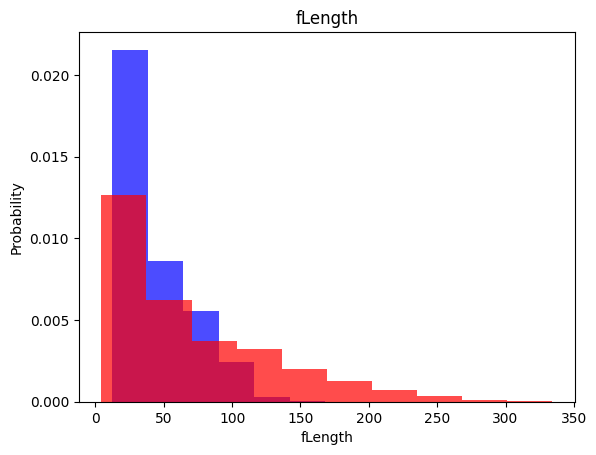

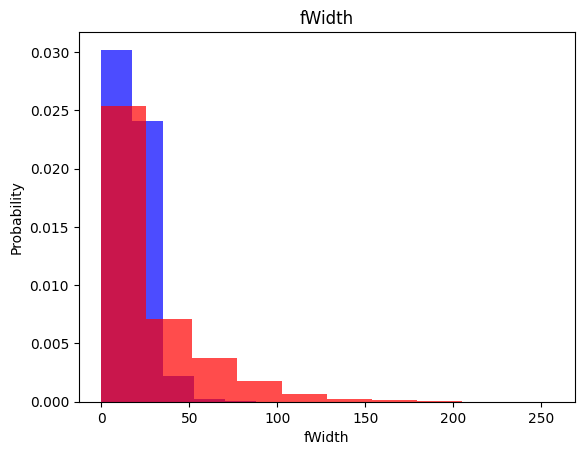

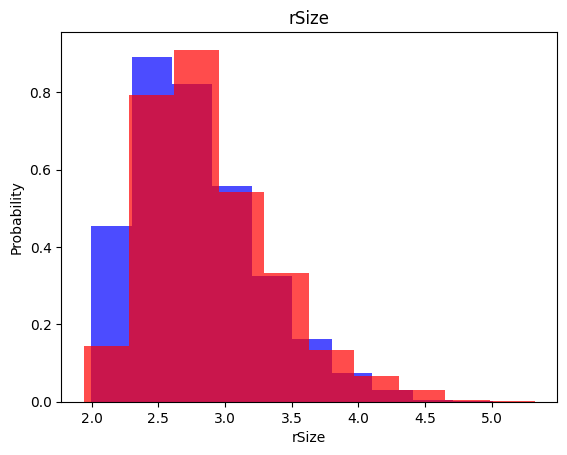

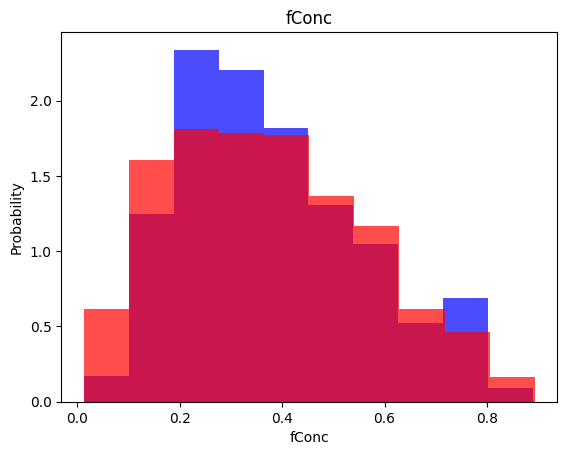

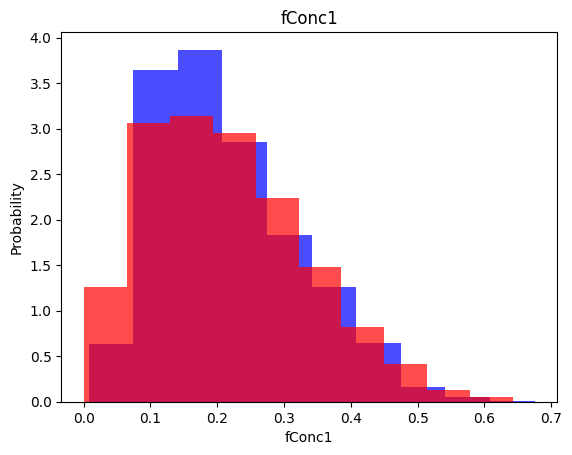

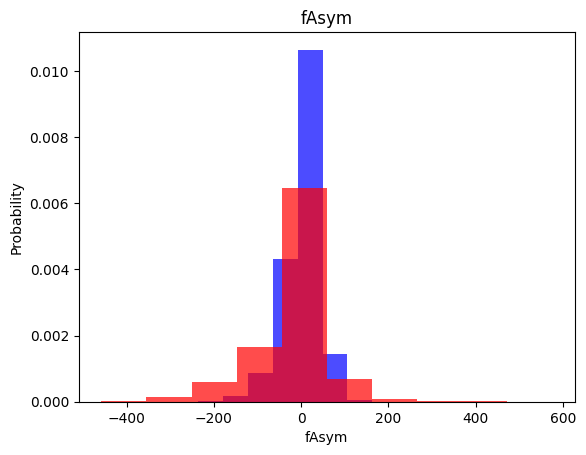

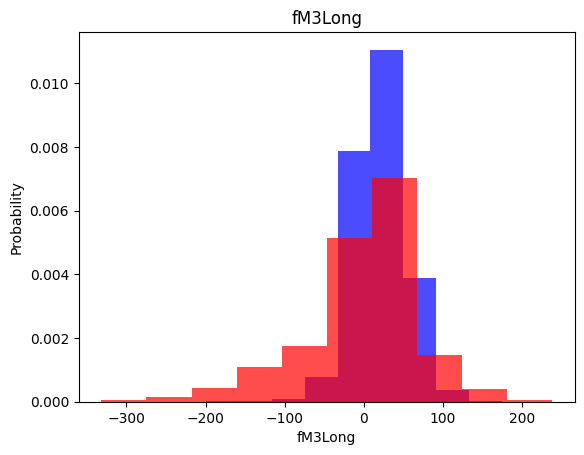

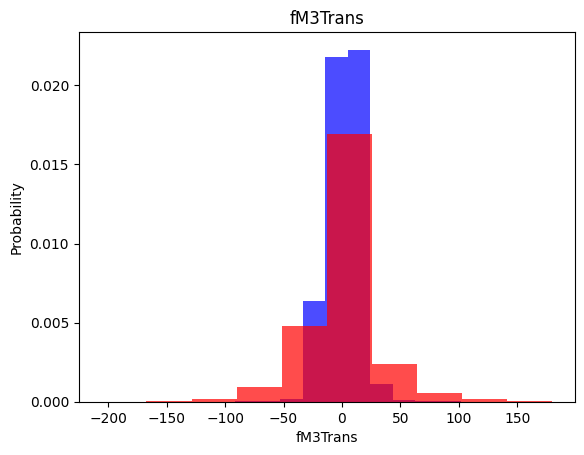

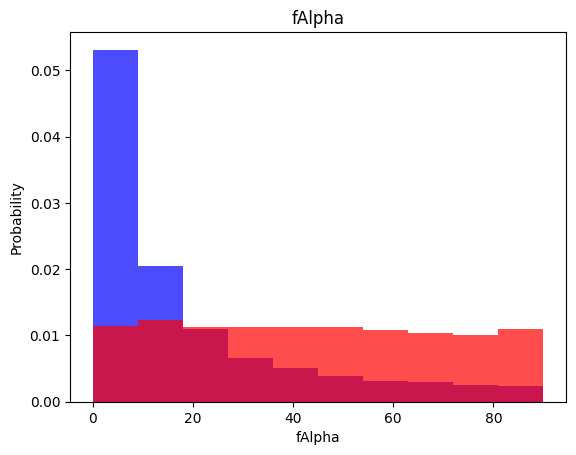

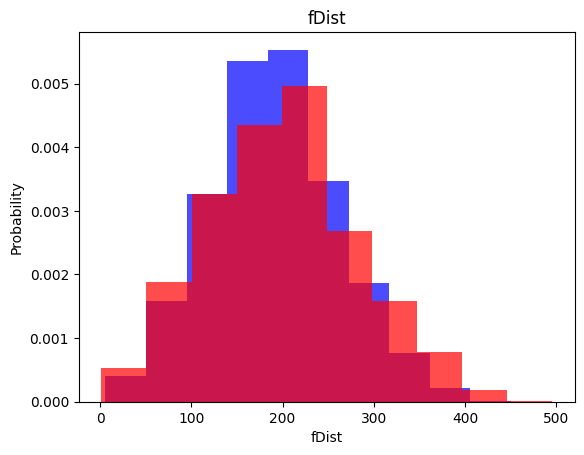

In [46]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color = "blue", label = "gamma", alpha=0.7, density = True)
  plt.hist(df[df['class'] == 0][label], color = "red", label = "hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.show()

# Train, Validation, test datasets

In [47]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 *len(df))])

In [16]:
def scale_dataset(dataframe):
  x = dataframe[dataframe.cols[:-1]].values  # all the data
  y = dataframe[dataframe.cols[-1]].values   # class field data

  scaler = StandardScaler()
  X = scaler.fit_transform(x)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y


In [17]:
print(len(train[train['class'] == 1]))  # gamma
print(len(train[train['class'] == 0]))  # hadron

7370
4042


In [48]:
#  we want to over sample of train dataset as hadron is less then gamma value
#  we imported from imblearn.over_sampling import RandomOverSampler at top


# Rewrite the function again
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values  # all the data
  y = dataframe[dataframe.columns[-1]].values   # class field data

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y


In [49]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [50]:
print(sum(y_train == 1))
print(sum(y_train == 0)) # now both gamma and hadron are evenly equal

7362
7362


# K-nearest Neighbour Algorithm

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [52]:
knn_model = KNeighborsClassifier(n_neighbors=5)

# train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
# Predict the data using model
y_pred = knn_model.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1292
           1       0.87      0.86      0.87      2512

    accuracy                           0.82      3804
   macro avg       0.80      0.81      0.81      3804
weighted avg       0.83      0.82      0.83      3804



# Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [57]:
# predict the model
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51      1292
           1       0.75      0.88      0.81      2512

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.71      3804



Navie Bayes theorm is more wost

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lg_model = LogisticRegression()

# Train the model
lg_model.fit(X_train, y_train)

LogisticRegression()

In [60]:
# Predict the model
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1292
           1       0.86      0.82      0.84      2512

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Logistic Regression is better than navie bayes theorem but not better than k-nearest neighbour

# SVM


In [61]:
from sklearn.svm import SVC

In [62]:
svm_model = SVC()

# Train the model
svm_model = svm_model.fit(X_train, y_train)

In [63]:
# Predict the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1292
           1       0.90      0.89      0.90      2512

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.86      0.87      3804



SVM model is more better then all above models

# Neural Network

In [64]:
import tensorflow as tf

In [66]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Binary Crossentropy")
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.grid(True)

  plt.show()

In [70]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr = 0.01, batch_size = 32


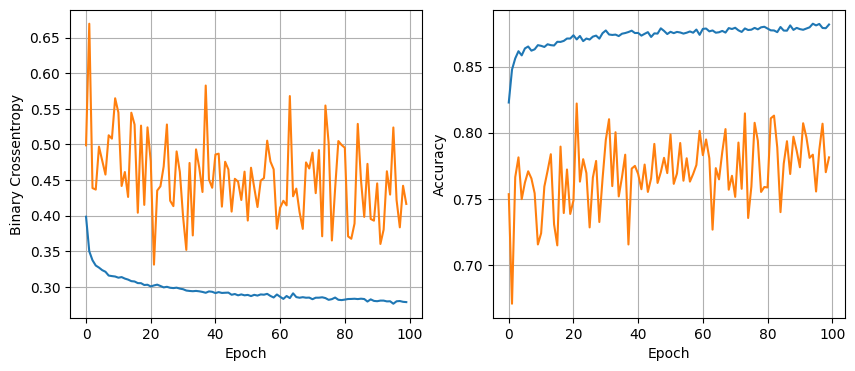

119/119 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8678
16 nodes, dropout 0, lr = 0.01, batch_size = 64


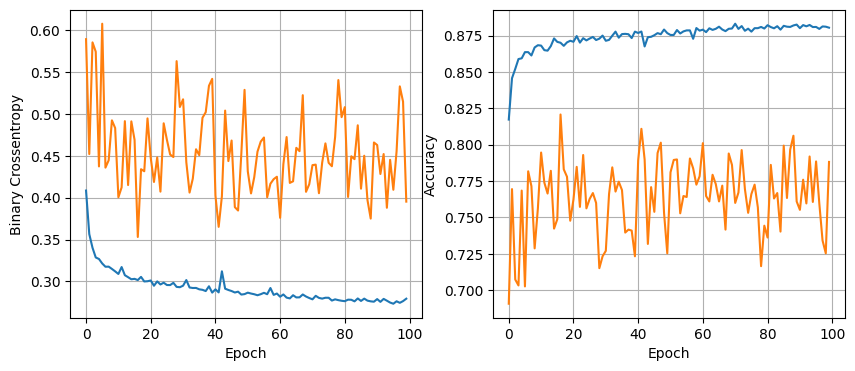

119/119 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8649
16 nodes, dropout 0, lr = 0.01, batch_size = 128


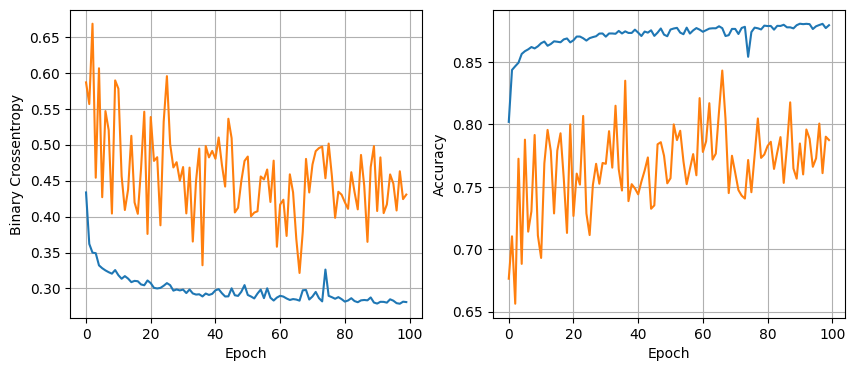

119/119 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8659
16 nodes, dropout 0, lr = 0.005, batch_size = 32


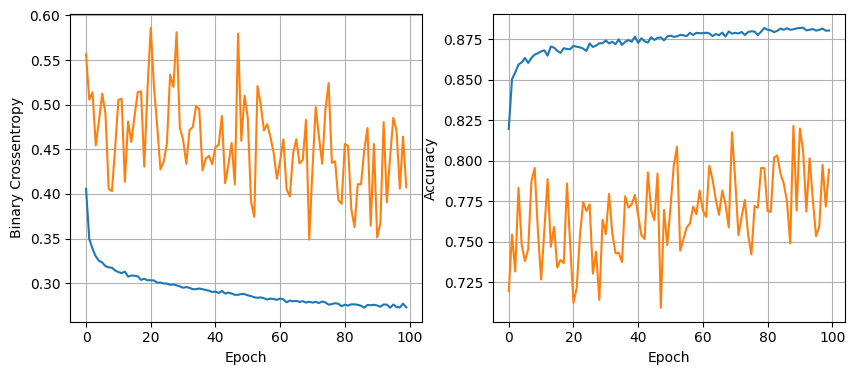

119/119 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8738
16 nodes, dropout 0, lr = 0.005, batch_size = 64


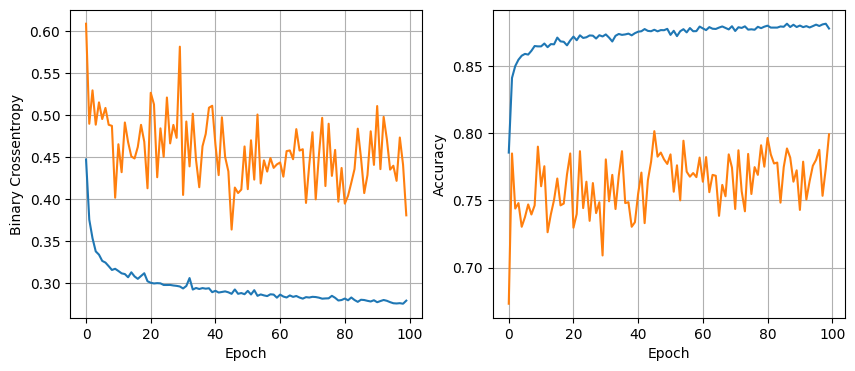

119/119 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8625
16 nodes, dropout 0, lr = 0.005, batch_size = 128


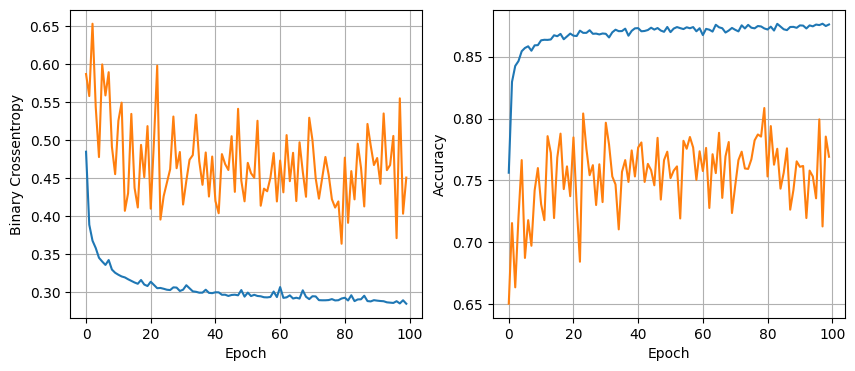

119/119 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8678
16 nodes, dropout 0, lr = 0.001, batch_size = 32


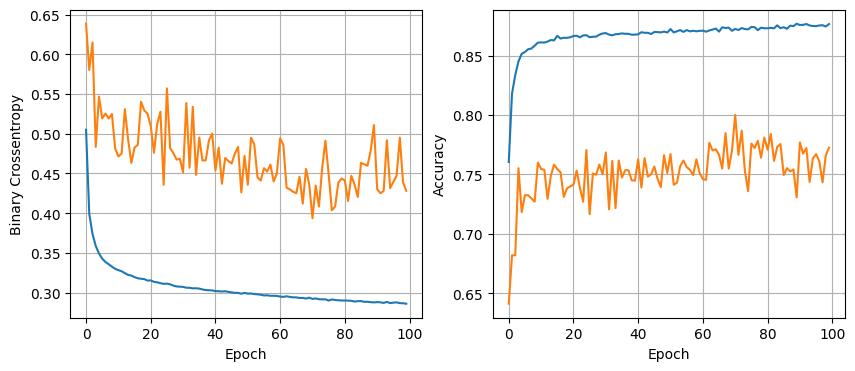

119/119 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8683
16 nodes, dropout 0, lr = 0.001, batch_size = 64


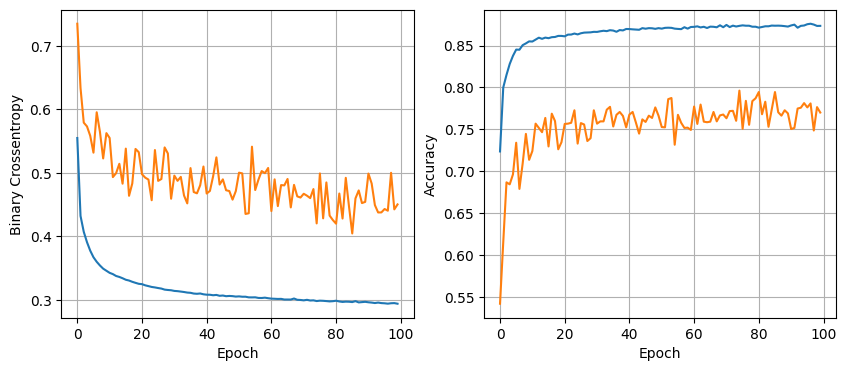

119/119 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8659
16 nodes, dropout 0, lr = 0.001, batch_size = 128


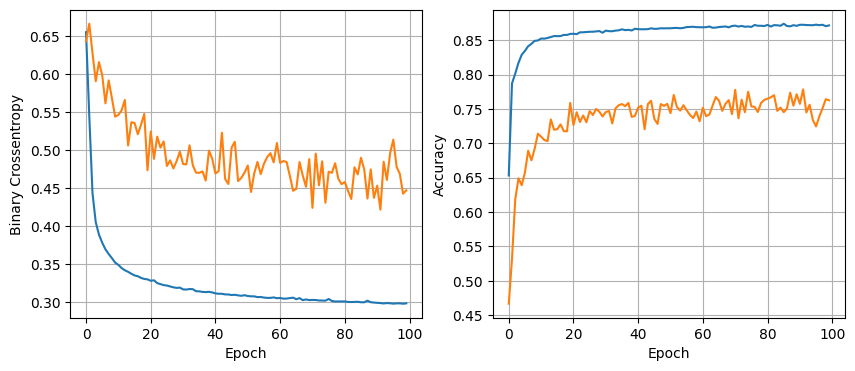

119/119 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8665
16 nodes, dropout 0.2, lr = 0.01, batch_size = 32


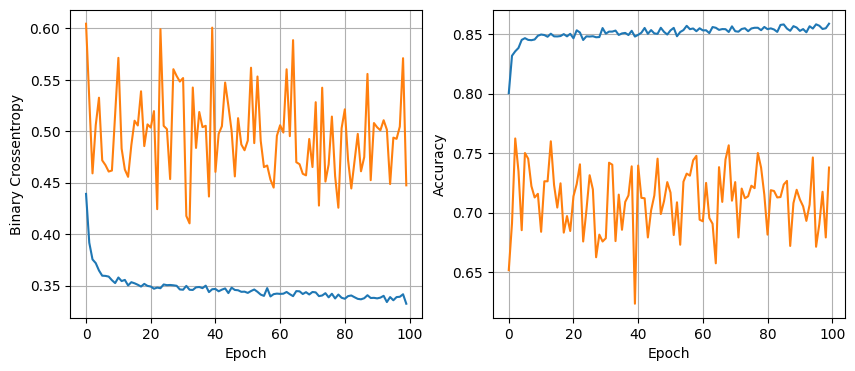

119/119 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8657
16 nodes, dropout 0.2, lr = 0.01, batch_size = 64


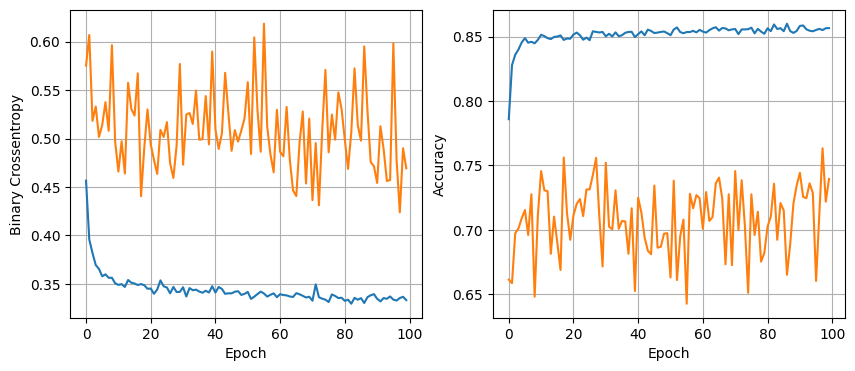

119/119 [==============================] - 1s 6ms/step - loss: 0.3257 - accuracy: 0.8654
16 nodes, dropout 0.2, lr = 0.01, batch_size = 128


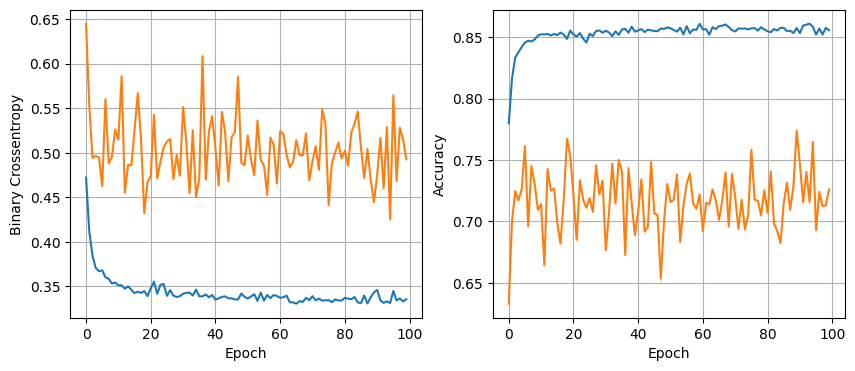

119/119 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8623
16 nodes, dropout 0.2, lr = 0.005, batch_size = 32


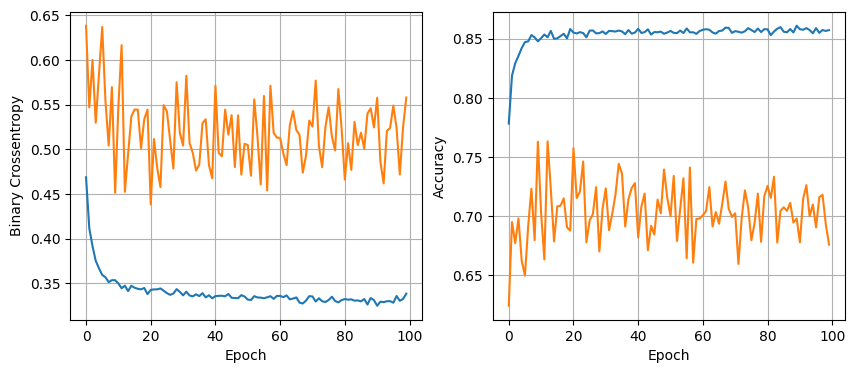

119/119 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8644
16 nodes, dropout 0.2, lr = 0.005, batch_size = 64


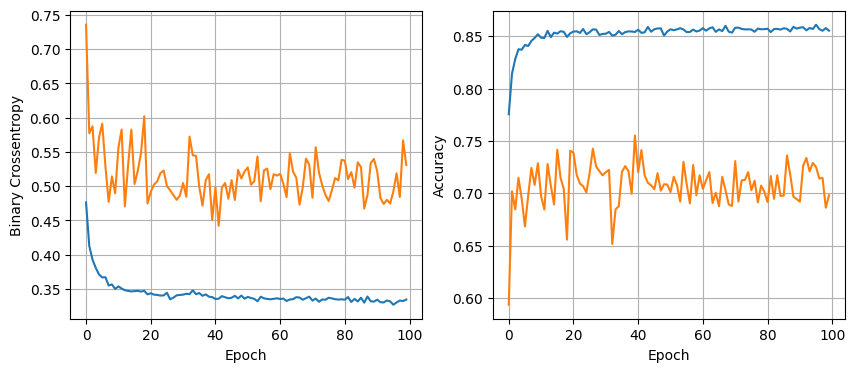

119/119 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8678
16 nodes, dropout 0.2, lr = 0.005, batch_size = 128


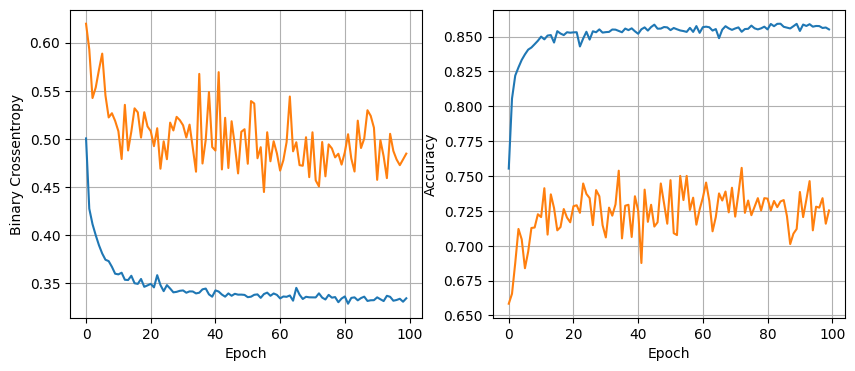

119/119 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8623
16 nodes, dropout 0.2, lr = 0.001, batch_size = 32


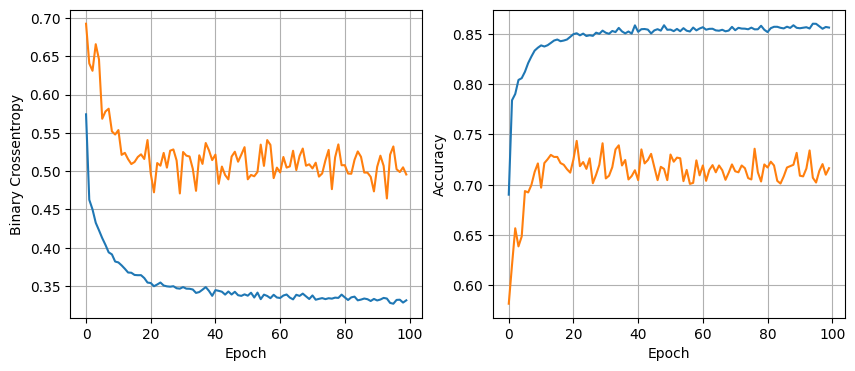

119/119 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8699
16 nodes, dropout 0.2, lr = 0.001, batch_size = 64


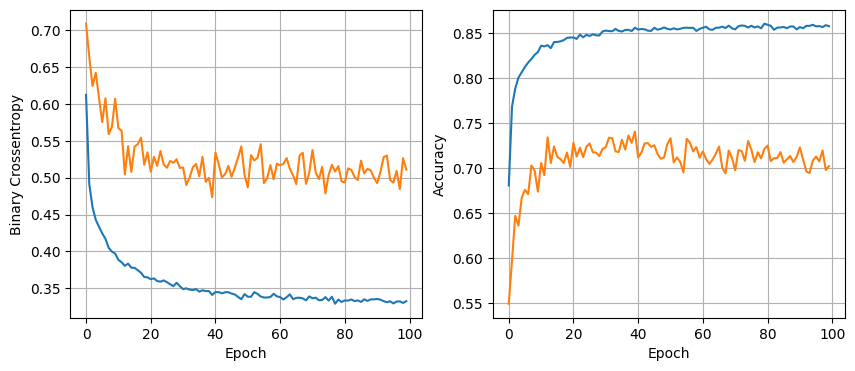

119/119 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8601
16 nodes, dropout 0.2, lr = 0.001, batch_size = 128


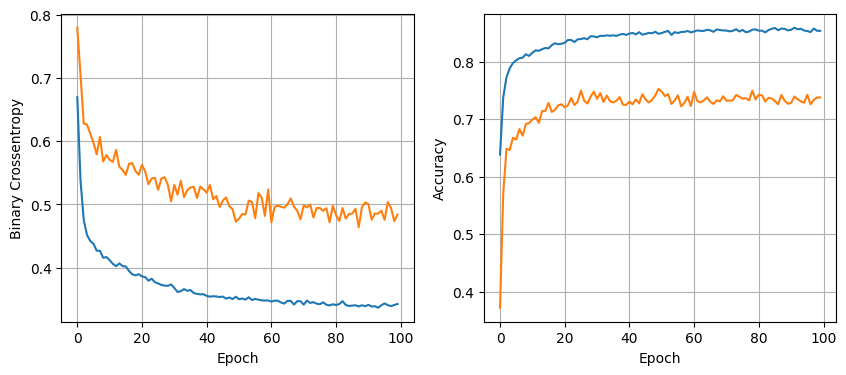

119/119 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8654
32 nodes, dropout 0, lr = 0.01, batch_size = 32


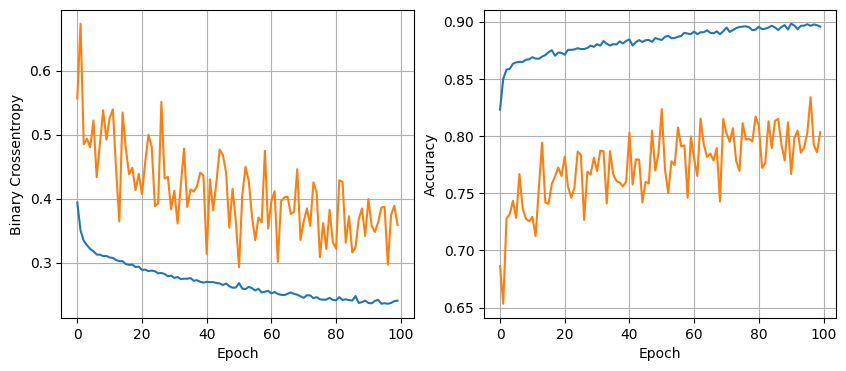

119/119 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8599
32 nodes, dropout 0, lr = 0.01, batch_size = 64


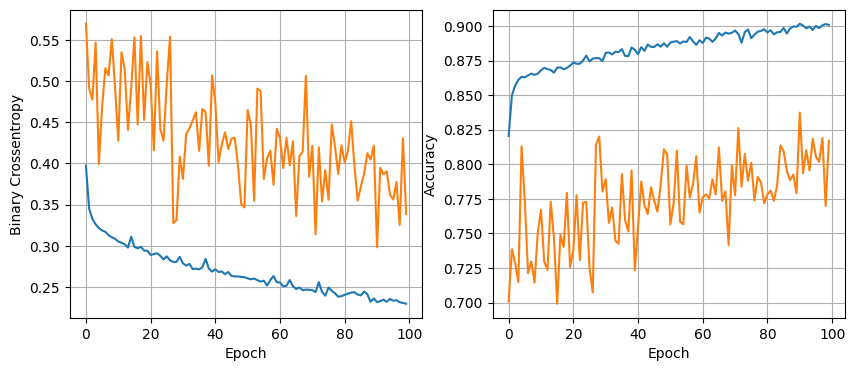

119/119 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8620
32 nodes, dropout 0, lr = 0.01, batch_size = 128


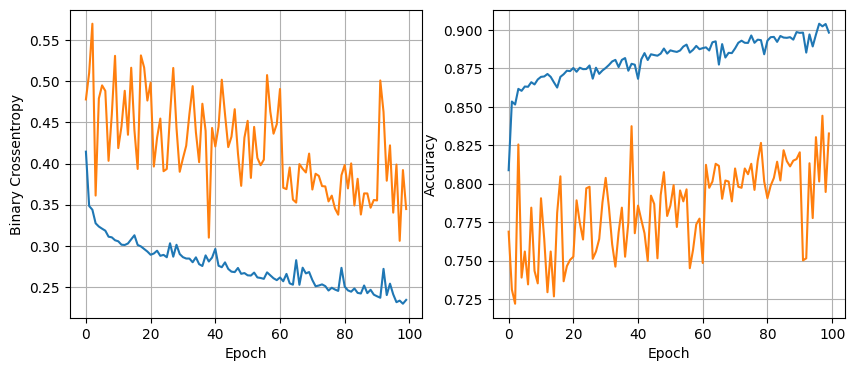

119/119 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8646
32 nodes, dropout 0, lr = 0.005, batch_size = 32


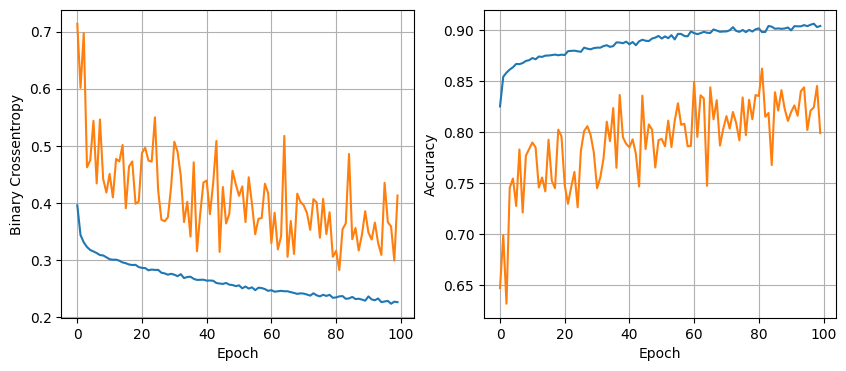

119/119 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8662
32 nodes, dropout 0, lr = 0.005, batch_size = 64


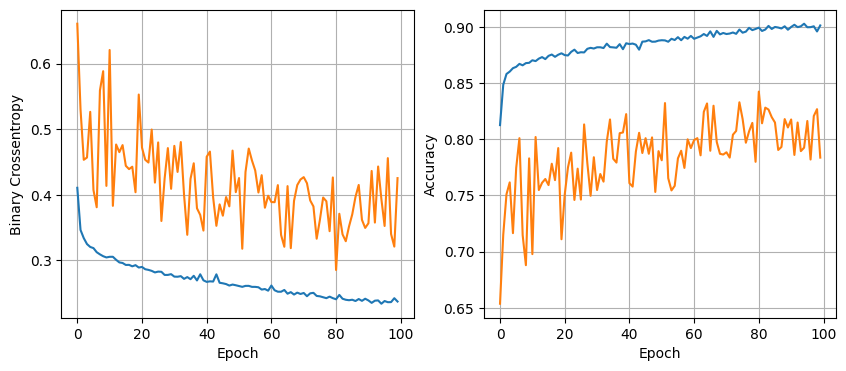

119/119 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8659
32 nodes, dropout 0, lr = 0.005, batch_size = 128


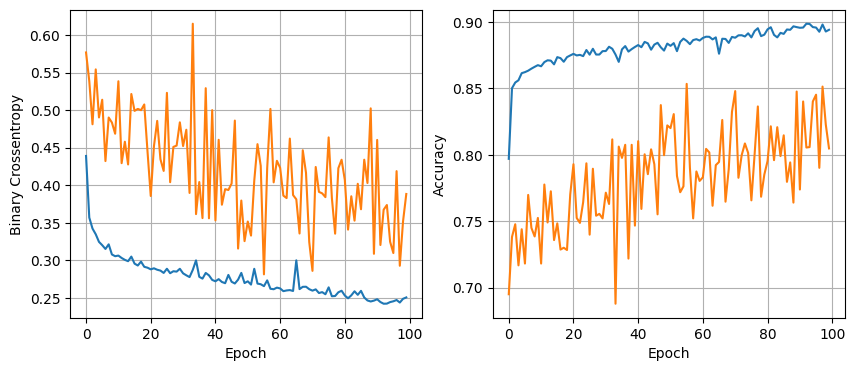

119/119 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8728
32 nodes, dropout 0, lr = 0.001, batch_size = 32


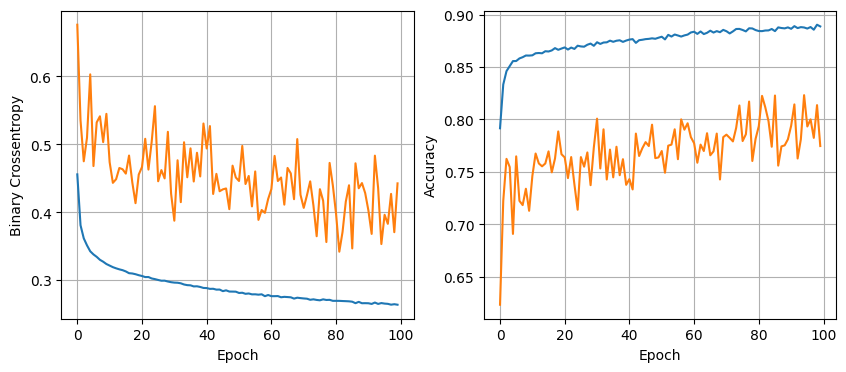

119/119 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8693
32 nodes, dropout 0, lr = 0.001, batch_size = 64


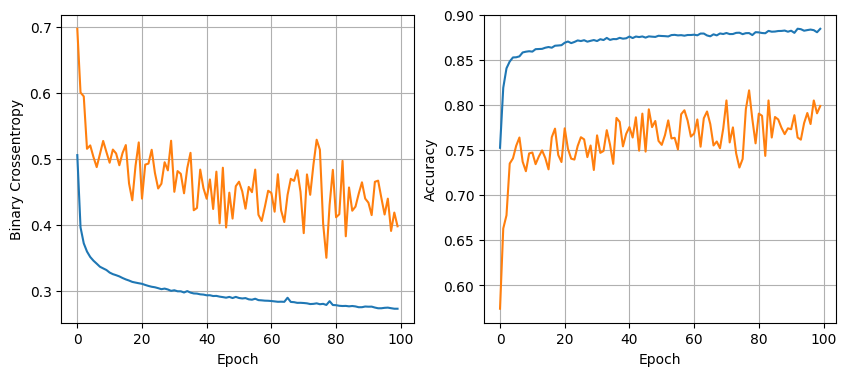

119/119 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8675
32 nodes, dropout 0, lr = 0.001, batch_size = 128


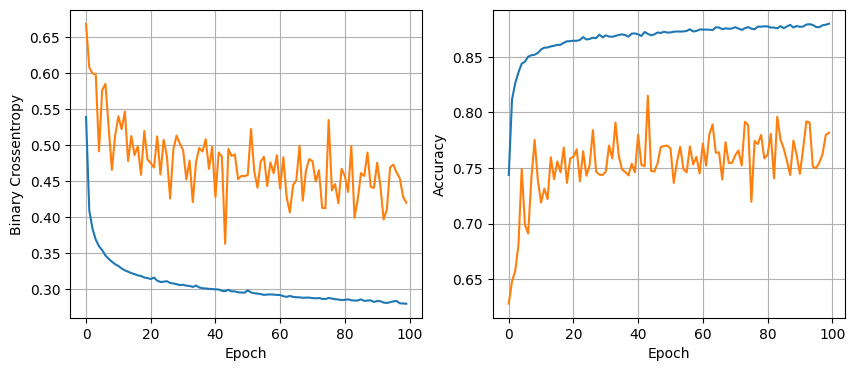

119/119 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8693
32 nodes, dropout 0.2, lr = 0.01, batch_size = 32


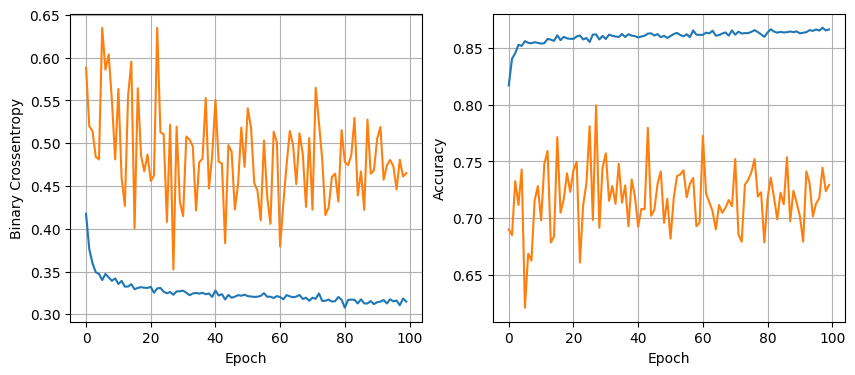

119/119 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8678
32 nodes, dropout 0.2, lr = 0.01, batch_size = 64


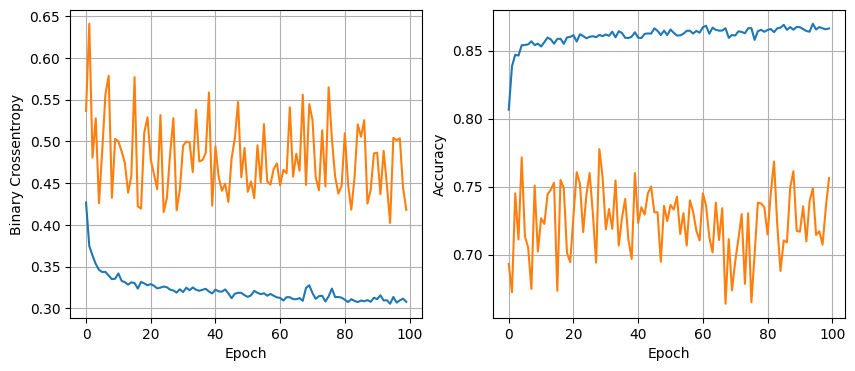

119/119 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8709
32 nodes, dropout 0.2, lr = 0.01, batch_size = 128


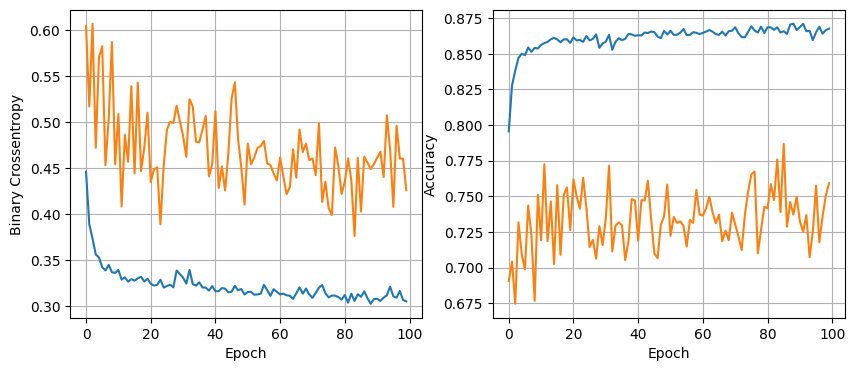

119/119 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8625
32 nodes, dropout 0.2, lr = 0.005, batch_size = 32


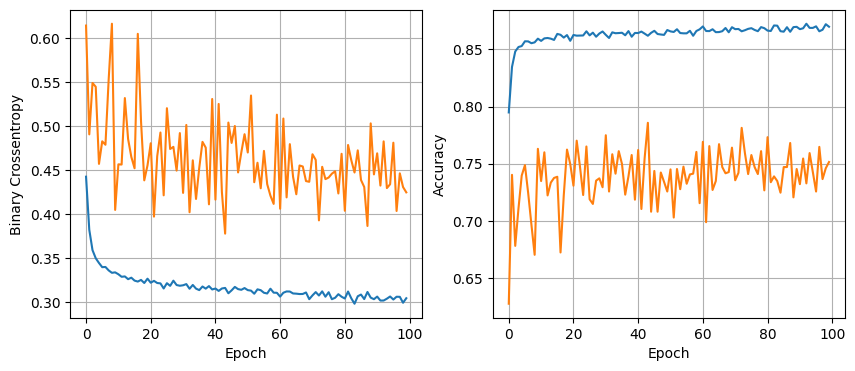

119/119 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8683
32 nodes, dropout 0.2, lr = 0.005, batch_size = 64


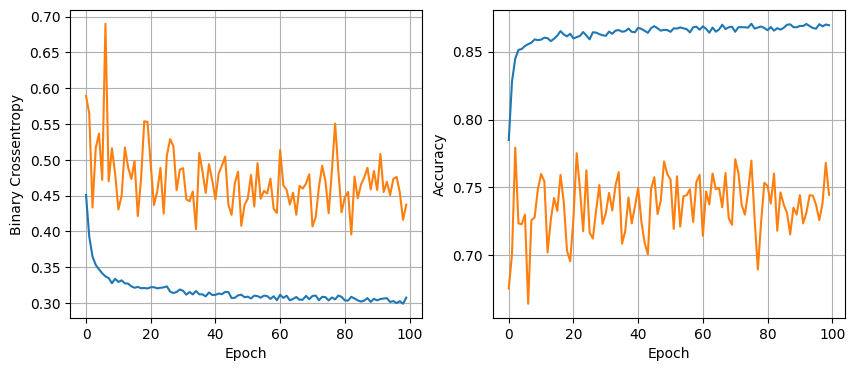

119/119 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8651
32 nodes, dropout 0.2, lr = 0.005, batch_size = 128


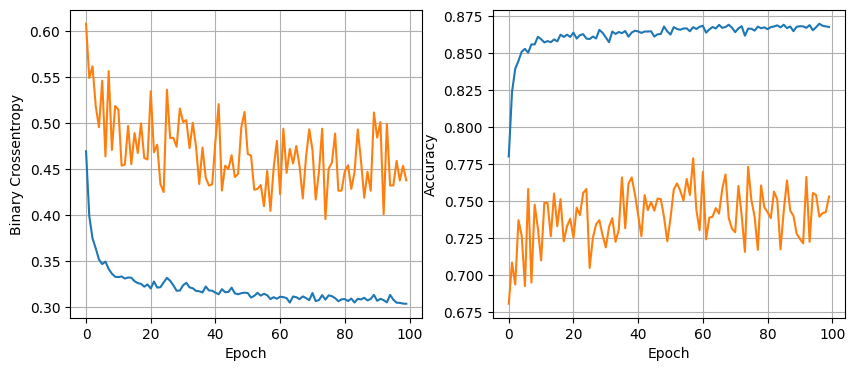

119/119 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8686
32 nodes, dropout 0.2, lr = 0.001, batch_size = 32


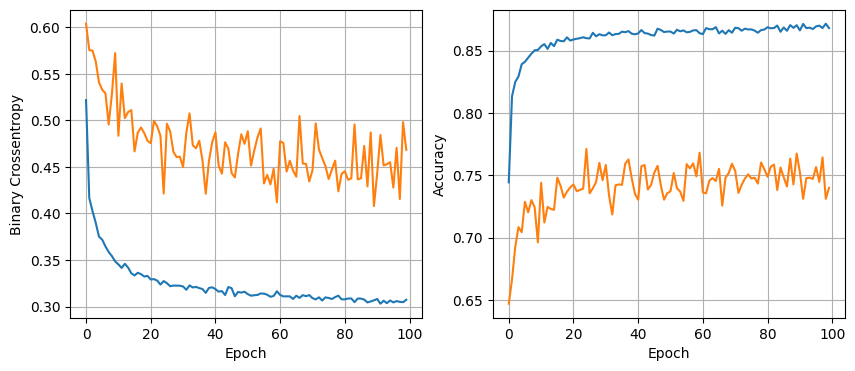

119/119 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8715
32 nodes, dropout 0.2, lr = 0.001, batch_size = 64


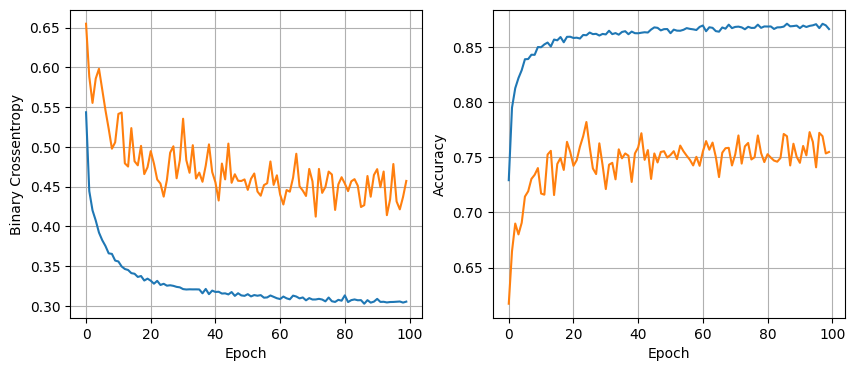

119/119 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8717
32 nodes, dropout 0.2, lr = 0.001, batch_size = 128


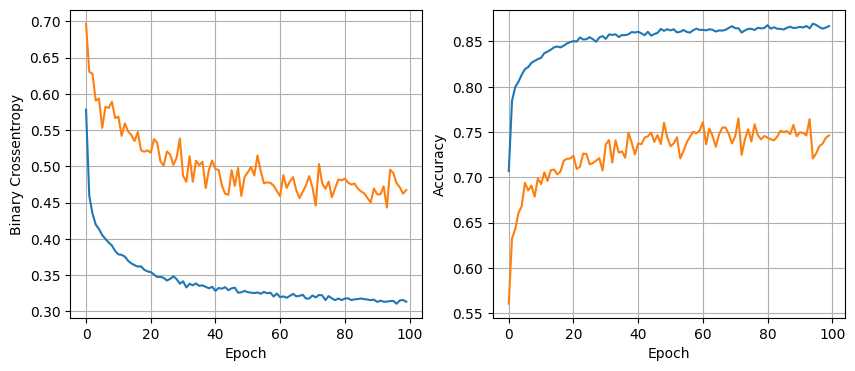

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8683
64 nodes, dropout 0, lr = 0.01, batch_size = 32


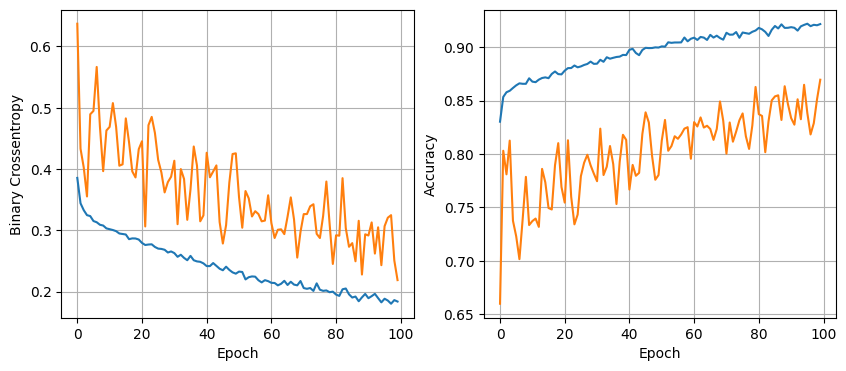

119/119 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.8612
64 nodes, dropout 0, lr = 0.01, batch_size = 64


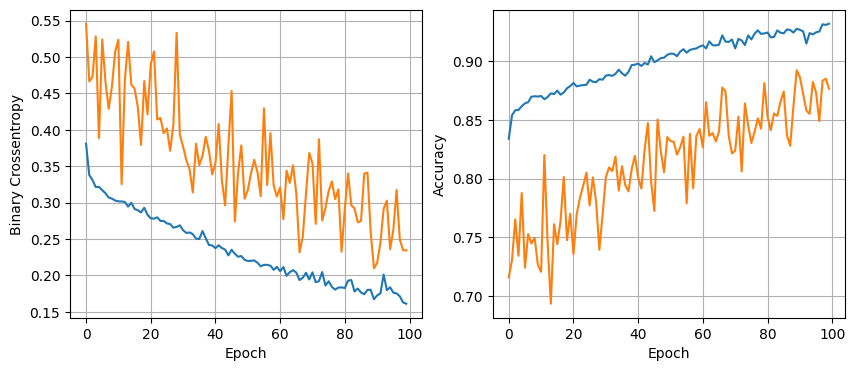

119/119 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.8549
64 nodes, dropout 0, lr = 0.01, batch_size = 128


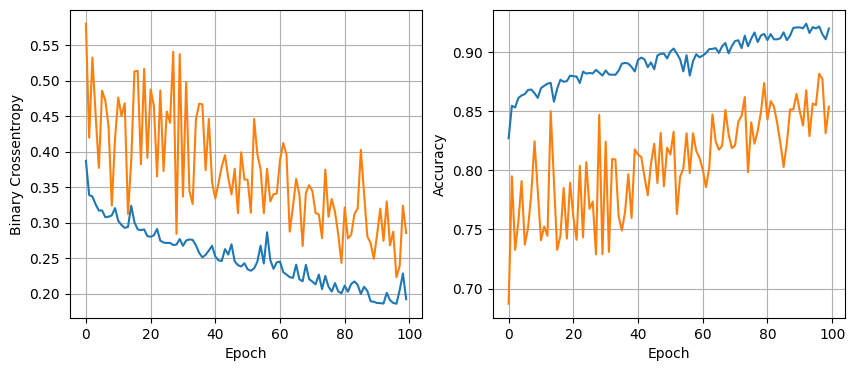

119/119 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8628
64 nodes, dropout 0, lr = 0.005, batch_size = 32


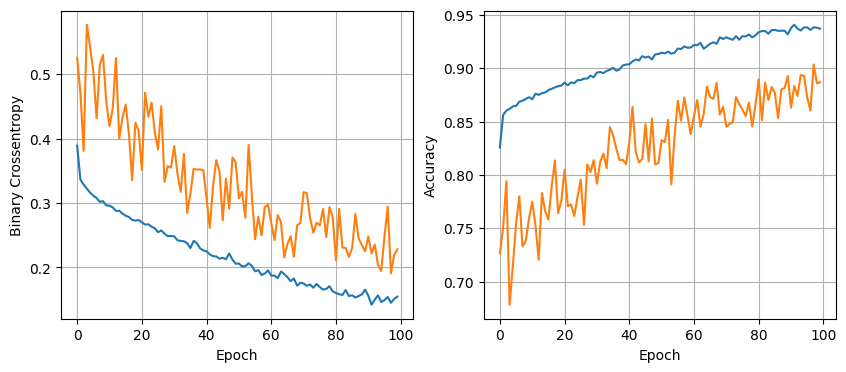

119/119 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.8591
64 nodes, dropout 0, lr = 0.005, batch_size = 64


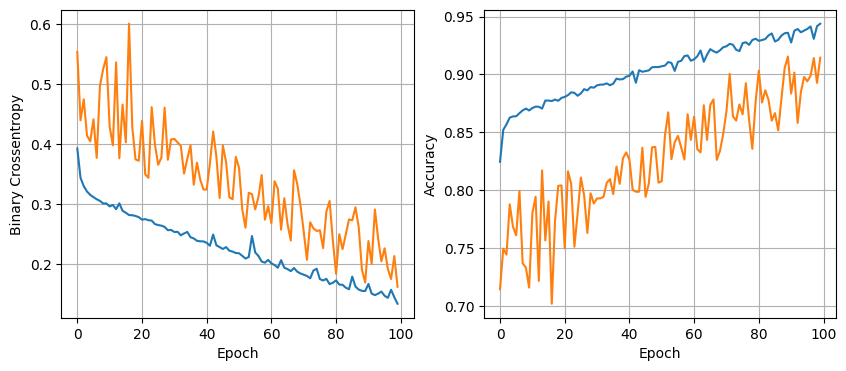

119/119 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.8515
64 nodes, dropout 0, lr = 0.005, batch_size = 128


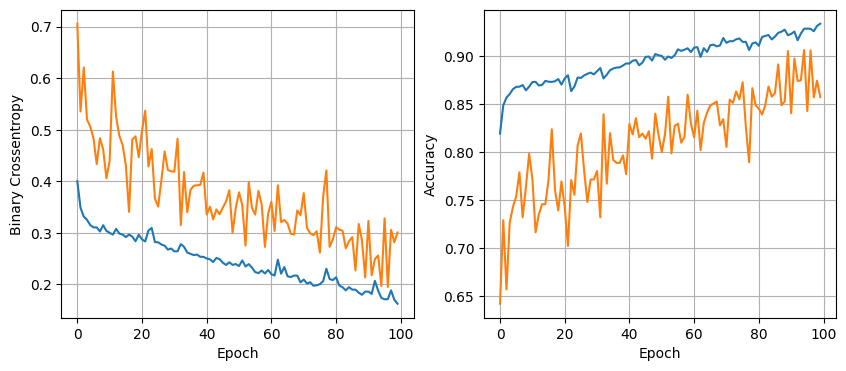

119/119 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.8638
64 nodes, dropout 0, lr = 0.001, batch_size = 32


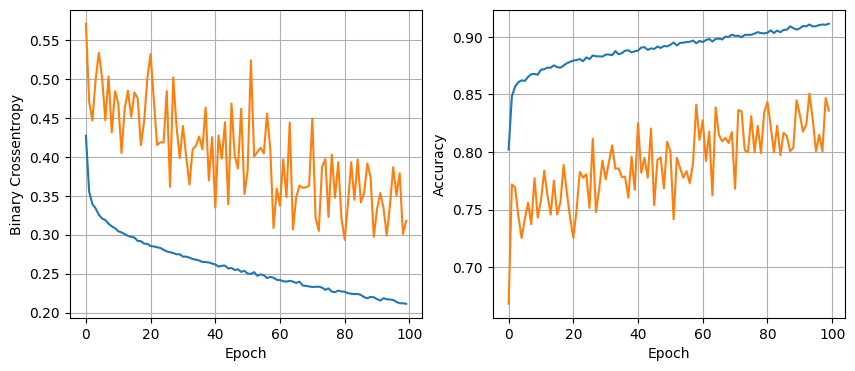

119/119 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8728
64 nodes, dropout 0, lr = 0.001, batch_size = 64


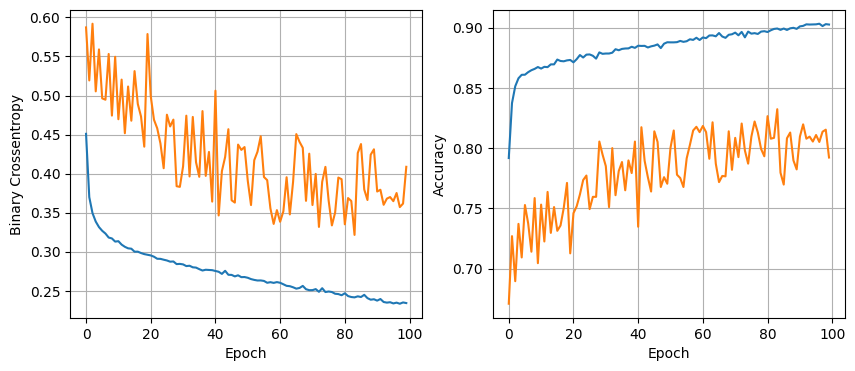

119/119 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8720
64 nodes, dropout 0, lr = 0.001, batch_size = 128


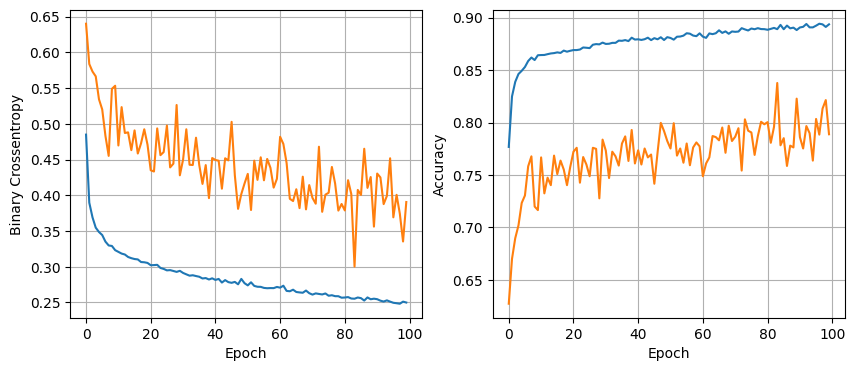

119/119 [==============================] - 0s 3ms/step - loss: 0.3267 - accuracy: 0.8717
64 nodes, dropout 0.2, lr = 0.01, batch_size = 32


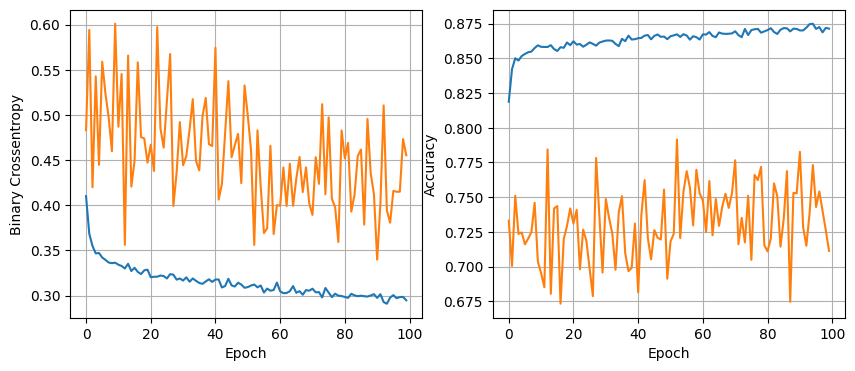

119/119 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8654
64 nodes, dropout 0.2, lr = 0.01, batch_size = 64


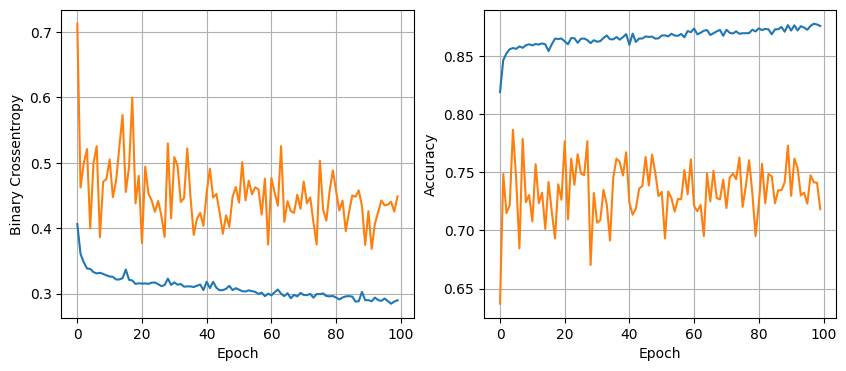

119/119 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8641
64 nodes, dropout 0.2, lr = 0.01, batch_size = 128


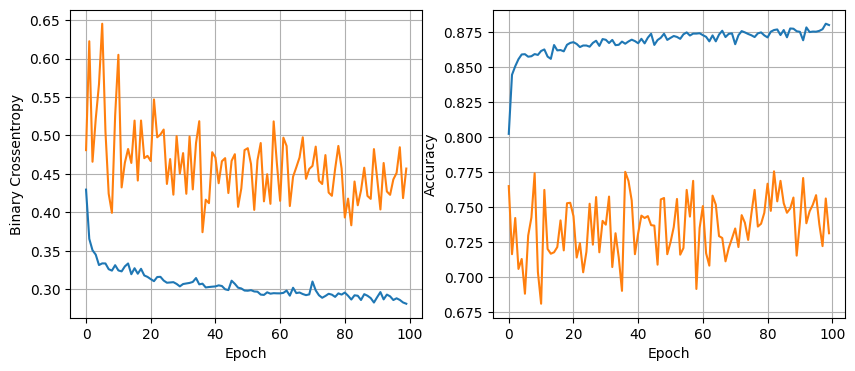

119/119 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8683
64 nodes, dropout 0.2, lr = 0.005, batch_size = 32


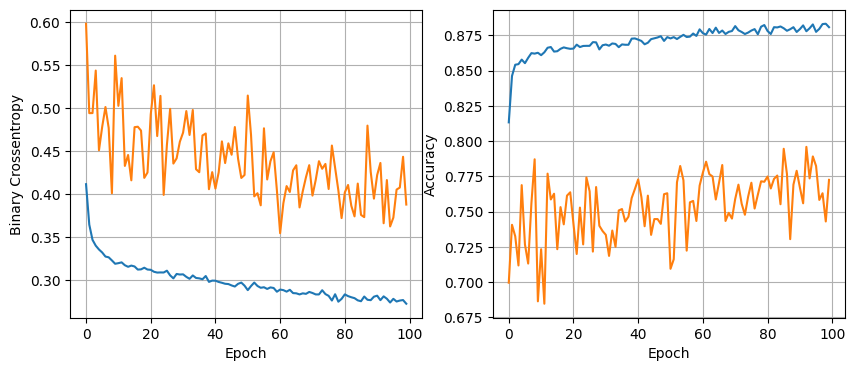

119/119 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8730
64 nodes, dropout 0.2, lr = 0.005, batch_size = 64


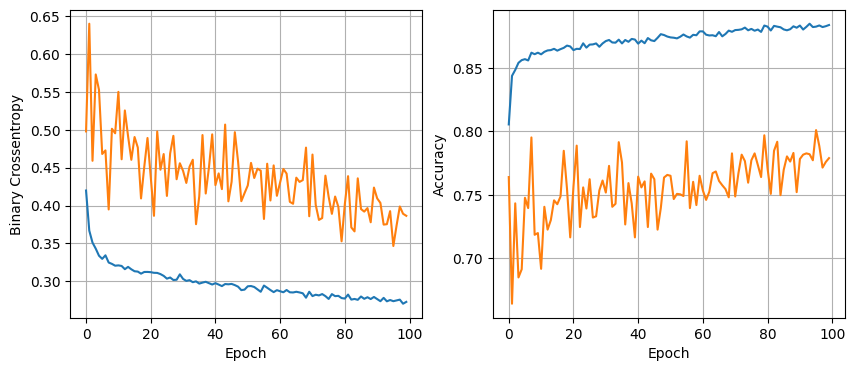

119/119 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8741
64 nodes, dropout 0.2, lr = 0.005, batch_size = 128


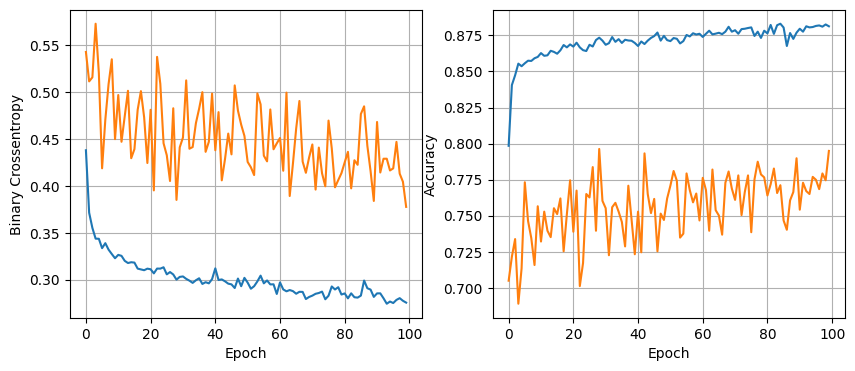

119/119 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8725
64 nodes, dropout 0.2, lr = 0.001, batch_size = 32


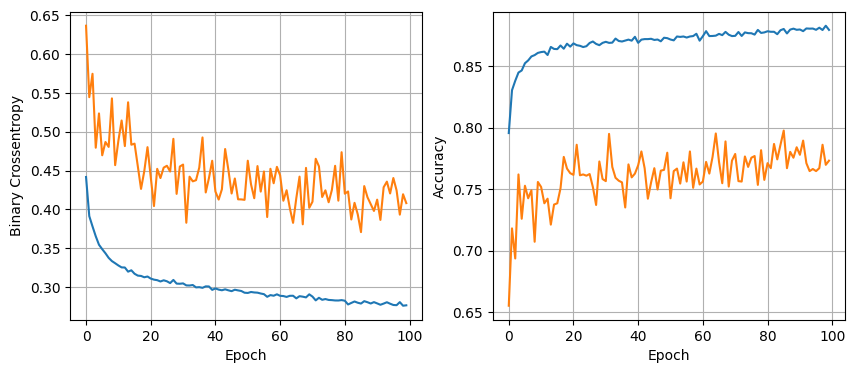

119/119 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8736
64 nodes, dropout 0.2, lr = 0.001, batch_size = 64


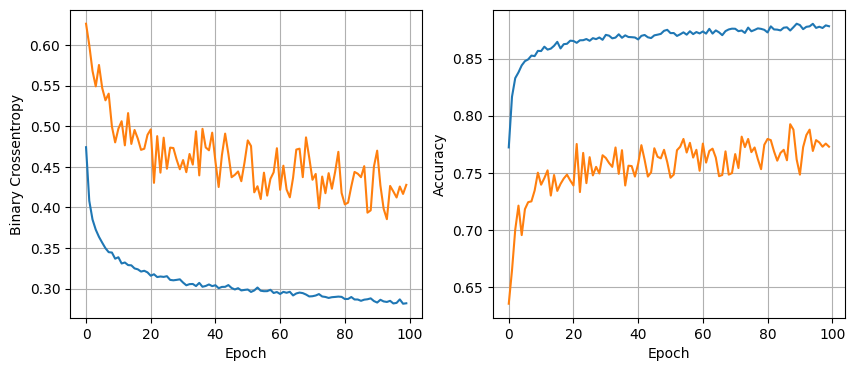

119/119 [==============================] - 0s 3ms/step - loss: 0.3104 - accuracy: 0.8728
64 nodes, dropout 0.2, lr = 0.001, batch_size = 128


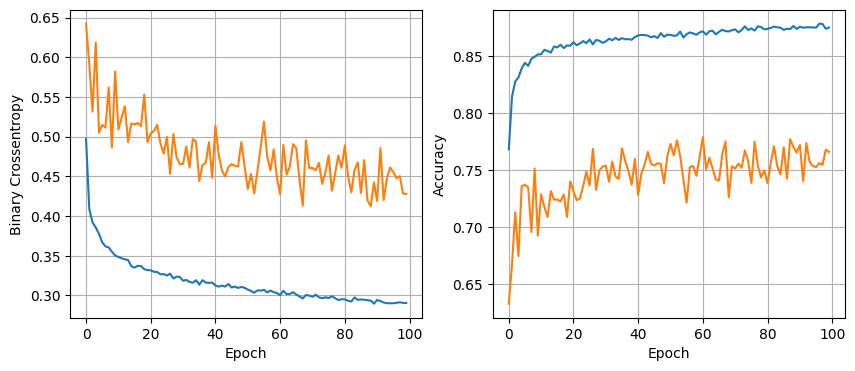

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8688


In [71]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr = {lr}, batch_size = {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)

                val_loss = model.evaluate(X_valid, y_valid)[0]

                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [74]:
# predict the data
y_pred = least_loss_model.predict(X_test)
y_pred

119/119 [==============================] - 0s 4ms/step


array([[0.9970045 ],
       [0.0833258 ],
       [0.57686394],
       ...,
       [0.9225932 ],
       [0.9962433 ],
       [0.65495163]], dtype=float32)

In [76]:
y_pred = (y_pred > 0.5).astype(int)
y_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [78]:
# reshape the predicted values in one dimension
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )

y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1292
           1       0.89      0.93      0.91      2512

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.86      3804
weighted avg       0.88      0.88      0.88      3804

